In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.stats import chi2_contingency

In [2]:
# read in files
df = pd.read_csv("./moz_train.csv",sep="|")
df_test = pd.read_csv("./moz_test.csv",sep="|")

In [3]:
df.describe(include='all') # overview of full data

,id,industry,geography,most_common_browser,session_time_prior_month_seconds,prior_month_paid
count,4.800000e+04,40636,48000,48000,48000.000000,48000.000000
unique,NaN,8,16,4,NaN,NaN
top,NaN,health care,USA,Chrome,NaN,NaN
freq,NaN,6052,8573,24194,NaN,NaN
mean,4.997442e+09,NaN,NaN,NaN,1952.151854,85.624461
std,2.896754e+09,NaN,NaN,NaN,2579.835645,32.754654
min,3.134830e+05,NaN,NaN,NaN,1.000000,0.040000
25%,2.481218e+09,NaN,NaN,NaN,612.000000,63.845328
50%,4.993512e+09,NaN,NaN,NaN,1210.000000,87.822595
75%,7.516707e+09,NaN,NaN,NaN,2289.000000,111.080471


In [4]:
df.dtypes

id                                    int64
industry                             object
geography                            object
most_common_browser                  object
session_time_prior_month_seconds      int64
prior_month_paid                    float64
dtype: object

In [5]:
df['industry'].value_counts()
df['geography'].value_counts()
df['most_common_browser'].value_counts()
df['prior_month_paid'].isnull().values.any()
df['session_time_prior_month_seconds'].isnull().values.any()

False

In [23]:

df['geography'].value_counts()

USA               8573
CA                5381
Canada            5328
US                4309
America           4305
United States     4270
UK                2114
Pakistan          1797
Greece            1782
India             1773
Spain             1748
France            1739
Esp               1735
GB                1118
United Kingdom    1029
England            999
Name: geography, dtype: int64

In [19]:
df.isna().sum()
df['industry'].fillna(value="None", inplace=True) # fill in fake values for null
df_test.isna().sum()
df_test['industry'].fillna(value="None", inplace=True) # fill in fake values for null

In [7]:
df.corr() # relatively weak correlation between the 2 continuous variables (if it were strong, we could perhaps do a simple linear regression)

,id,session_time_prior_month_seconds,prior_month_paid
id,1.000000,0.001831,-0.001129
session_time_prior_month_seconds,0.001831,1.000000,0.217124
prior_month_paid,-0.001129,0.217124,1.000000


In [8]:
chi2_contingency(pd.crosstab(df['industry'], df['geography'])) # p > 0.05 so independent (look at relationship b/w categorical)

(131.58733682257377,
 0.22128204498782403,
 120,
 array([[ 539.20125   ,  673.97025   ,  667.332     ,  125.12475   ,
          217.30875   ,  217.80975   ,  140.0295    ,  223.1955    ,
          222.06825   ,  225.07425   ,  218.937     ,  264.7785    ,
          539.70225   , 1073.76825   ,  128.88225   ,  534.8175    ],
        [ 660.45875   ,  825.53508333,  817.404     ,  153.26325   ,
          266.17791667,  266.79158333,  171.51983333,  273.3885    ,
          272.00775   ,  275.68975   ,  268.17233333,  324.32283333,
          661.07241667, 1315.24108333,  157.86575   ,  655.08916667],
        [ 542.78875   ,  678.45441667,  671.772     ,  125.95725   ,
          218.75458333,  219.25891667,  140.96116667,  224.6805    ,
          223.54575   ,  226.57175   ,  220.39366667,  266.54016667,
          543.29308333, 1080.91241667,  129.73975   ,  538.37583333],
        [ 530.1428125 ,  662.64772917,  656.121     ,  123.0226875 ,
          213.65802083,  214.15060417,  137.6770416

In [9]:
chi2_contingency(pd.crosstab(df['most_common_browser'], df['geography'])) # p > 0.05 so independent (look at relationship b/w categorical)

(29.617311614743304,
 0.9626576944608211,
 45,
 array([[2169.899375  , 2712.24820833, 2685.534     ,  503.537625  ,
          874.51229167,  876.52845833,  563.51858333,  898.20225   ,
          893.665875  ,  905.762875  ,  881.06483333, 1065.54408333,
         2171.91554167, 4321.14920833,  518.658875  , 2152.25791667],
        [ 710.4146875 ,  887.97710417,  879.231     ,  164.8558125 ,
          286.31114583,  286.97122917,  184.49329167,  294.067125  ,
          292.5819375 ,  296.5424375 ,  288.45641667,  348.85404167,
          711.07477083, 1414.72360417,  169.8064375 ,  704.63895833],
        [ 711.6703125 ,  889.5465625 ,  880.785     ,  165.1471875 ,
          286.8171875 ,  287.4784375 ,  184.819375  ,  294.586875  ,
          293.0990625 ,  297.0665625 ,  288.96625   ,  349.470625  ,
          712.3315625 , 1417.2240625 ,  170.1065625 ,  705.884375  ],
        [ 713.015625  ,  891.228125  ,  882.45      ,  165.459375  ,
          287.359375  ,  288.021875  ,  185.16875   ,

In [10]:
chi2_contingency(pd.crosstab(df['most_common_browser'], df['industry'])) # p > 0.05 so independent (look at relationship b/w categorical)

(28.361775599120328,
 0.24507692416632806,
 24,
 array([[3030.2985    , 3711.76283333, 3050.46016667, 2979.39029167,
         3050.46016667, 3039.87529167, 2963.26095833, 1192.56258333,
         1175.92920833],
        [ 992.10525   , 1215.21341667,  998.70608333,  975.43814583,
          998.70608333,  995.24064583,  970.15747917,  390.43929167,
          384.99360417],
        [ 993.85875   , 1217.36125   , 1000.47125   ,  977.1621875 ,
         1000.47125   ,  996.9996875 ,  971.8721875 ,  391.129375  ,
          385.6740625 ],
        [ 995.7375    , 1219.6625    , 1002.3625    ,  979.009375  ,
         1002.3625    ,  998.884375  ,  973.709375  ,  391.86875   ,
          386.403125  ]]))

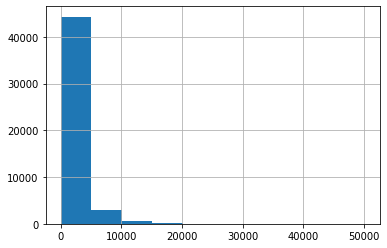

In [11]:
hist = df['session_time_prior_month_seconds'].hist(bins=10) # indicates there are outliers (option: we could trim these)

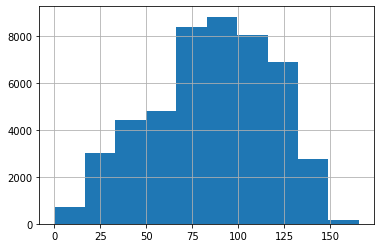

In [12]:
hist = df['prior_month_paid'].hist(bins=10) # no major outliers

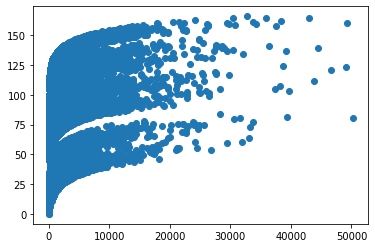

In [13]:
# look at visual relationship between session time and prior month paid
plt.scatter(df['session_time_prior_month_seconds'], df['prior_month_paid'])
plt.show() 

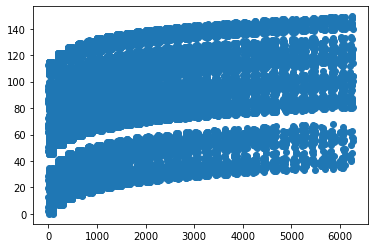

In [14]:
# trimming is an option if there are outliers (this was done purely for investigation purposes)
q = df["session_time_prior_month_seconds"].quantile(0.95)
df_trimmed = df[df["session_time_prior_month_seconds"] < q]
plt.scatter(df_trimmed['session_time_prior_month_seconds'], df_trimmed['prior_month_paid'])
plt.show() 

In [15]:
# assign data 
X = df['session_time_prior_month_seconds'].to_numpy().reshape(-1,1)
y = df['prior_month_paid'].to_numpy().reshape(-1,1)
X_test = df_test['session_time_prior_month_seconds'].to_numpy().reshape(-1,1)
y_test = df_test['prior_month_paid'].to_numpy().reshape(-1,1)

In [33]:
# one hot encoding categorical features (required if employing linear regression)
preproc = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(), ['industry', 'geography', 'most_common_browser']),
    ('scale', StandardScaler(), ['session_time_prior_month_seconds'])
], remainder='passthrough') 

# transform variables
X = preproc.fit_transform(df.iloc[:,:-1]) # features
y = df.iloc[:,-1] # last column (prior_month_paid) is what we want to predict/estimate

X_test = preproc.transform(df_test.iloc[:,:-1]) # features
y_test = df_test.iloc[:,-1] # last column (prior_month_paid) is what we want to predict/estimate

# fit the data
lr = LinearRegression()
model = lr.fit(X, y)

# make prediction (estimate prior_month_paid)
X_test = preproc.transform(df_test) # encode test data
y_pred = model.predict(X_test)
r_squared = lr.score(X, y)

print(r_squared) # r^2 value 

# output predictions alongside prior_month_paid
for i in range(len(y_pred)):
	print(y_test[i]," ",y_pred[i])

1.2752420258665964e-06
94.0861228866811   85.57690754143346
44.434942159291495   85.62103569844528
53.31147180559945   85.59858668466661
98.50042453358317   85.58952533918949
76.24612288668109   85.57146328039371
22.29   85.61369530483813
78.04057329615259   85.56355123931641
49.922133440562156   85.63290216036448
85.08585092994045   85.60404978971906
53.11371757896165   85.60927082104676
107.25437912434099   85.6330689261739
40.856122886681106   85.61062736673351
54.28   85.65103437962719
126.52441541679836   85.6762280581285
92.65057329615259   85.56493544534918
106.6022457733622   85.66297834421407
69.19910149055313   85.68228271173456
76.65042453358315   85.64449407628337
138.23057329615258   85.66610989320921
33.24147180559945   85.67181149341675
75.10585092994046   85.58859172846721
104.57949357461537   85.60996025244525
76.03759469228055   85.58300148278084
74.44213344056216   85.62787154731527
77.77147180559945   85.57401706876195
84.01224577336221   85.60680036482638
119.08441

45.684379124341014   85.58128478625147
89.92984046564274   85.57598125527788
67.96224577336221   85.62761608874355
84.00949357461536   85.56572735361871
129.39759469228056   85.62622616344005
95.18147180559946   85.56171236399099
79.67224577336219   85.62489002563927
47.002245773362205   85.58587891107861
73.81441541679837   85.5792232075148
101.384379124341   85.65413727616158
73.0089527279837   85.5847416137482
40.47294361119891   85.62119130200935
38.93437912434101   85.59790721530199
67.50910149055312   85.65369616330601
99.354379124341   85.57522761451756
2.11   85.62796491941354
103.09437912434099   85.57017464737903
114.61147180559946   85.62440691294029
115.43949357461537   85.68724262819664
87.65294361119888   85.60120950457974
108.5061228866811   85.64475420063037
126.724379124341   85.65887751667105
40.162943611198905   85.57562869710037
127.7129436111989   85.61137252301467
42.159101490553134   85.64934081073453
37.966122886681106   85.60897182096372
74.2489527279837   85.5

40.5161228866811   85.5873695720437
32.93949357461537   85.65198803628473
36.18147180559945   85.65948811979855
126.48437912434099   85.68177762705926
117.77147180559946   85.61150715865621
53.52213344056215   85.62084147294226
79.85732273553991   85.607022738733
113.00585092994045   85.6736507955723
67.7561228866811   85.61431912678977
100.83213344056216   85.64281800948129
79.6429436111989   85.65941269550636
57.8761228866811   85.68741954421701
92.41585092994045   85.593743450677
108.7   85.64225638860518
136.5689527279837   85.64355778045272
86.818758248682   85.67574026484215
125.0561228866811   85.57987922033826
97.98641396489096   85.6521419828766
130.14585092994048   85.66620168349374
107.33441541679836   85.67698246113564
123.5789527279837   85.61342938525748
92.60906649788001   85.59924738475563
32.270573296152584   85.66081973952332
129.01585092994046   85.56069861347865
31.174415416798357   85.67689411968747
128.88910149055314   85.58141033660579
98.50437912434099   85.6401

9.2   85.64965329251757
133.8722457733622   85.60854693053837
116.32759469228054   85.57467872393553
34.4061228866811   85.61912334574608
71.59057329615258   85.6778864631889
106.09   85.57087730728057
77.564379124341   85.6776352834528
92.84441541679837   85.64252256589025
84.66759469228055   85.65687884738419
85.30096538021482   85.61370318120538
98.76437912434099   85.59416339806049
93.71   85.62113244802664
87.34906649788   85.5755338664988
80.7   85.56573787885584
57.37147180559945   85.57733182494717
123.5129436111989   85.59340087357195
38.366122886681104   85.67636741800192
95.96585092994046   85.67893874315416
68.11910149055313   85.67932857792641
79.90612288668109   85.56489380480053
12.3561228866811   85.67411263974043
20.83441541679836   85.65254608359666
102.88759469228054   85.56885580633019
131.47053830347946   85.65725120579543
85.85   85.66186306396017
42.912943611198905   85.62605808657123
39.92294361119891   85.5952744627876
98.35759469228054   85.62121253306313
101.

126.52759469228054   85.59249255368647
73.85441541679836   85.66482642301679
95.038758248682   85.59797171689567
86.7189527279837   85.63673156999849
95.9761228866811   85.59231262537708
92.10147180559946   85.6114623089202
80.82147180559946   85.61588086339042
128.68437912434098   85.68064863694848
102.09522437723423   85.6824381301478
114.95910149055314   85.59861358111863
81.36224577336219   85.56735138049926
105.68   85.59658324207652
102.95441541679837   85.66066494375316
144.51820298110624   85.60316209254559
75.1622457733622   85.57874488740029
138.02883083359671   85.65866550934646
141.30057329615258   85.59815740007585
99.96759469228054   85.6003606042936
54.82147180559945   85.65649472189732
103.76759469228054   85.66793077018876
111.694379124341   85.62653087616671
105.13910149055313   85.61768155022136
46.752245773362205   85.66204608311362
81.2529436111989   85.65633720295432
95.13612288668112   85.64899564561676
23.272245773362197   85.60549852288356
74.27910149055312   8

56.0   85.65432579403922
84.5629436111989   85.58639244665056
108.85910149055313   85.6644175819248
108.3022457733622   85.6722993609422
100.04437912434099   85.6211487672333
20.60759469228055   85.59638295781276
118.54949357461537   85.61712204600227
78.064379124341   85.61835499826402
133.70910149055314   85.62565787588281
76.54371757896166   85.57207291440348
77.05585092994045   85.68771509266726
95.24949357461536   85.64640876737369
28.1722457733622   85.62191274385339
123.53438979166441   85.6849872305354
98.2529436111989   85.58890404722814
86.05759469228055   85.64446105991978
27.430502011022107   85.5952043150769
91.5258872223978   85.57966650069375
74.04441541679836   85.6565396448509
105.49759469228054   85.57431165325315
61.9629436111989   85.59458175093783
98.31441541679837   85.66518306791997
95.86147180559946   85.56281181829281
98.35612288668109   85.64461771411902
67.864379124341   85.5986370130922
117.4661228866811   85.64499561146408
103.84147180559944   85.6491251618

67.88147180559946   85.64788323175304
129.22641396489095   85.68698252185395
95.60588722239781   85.6302262405988
46.49759469228054   85.6444811896709
121.52147180559946   85.56578848028313
77.19906649788003   85.61702064913516
98.24   85.56406776669589
82.57   85.59857131486233
128.57295829986478   85.63505582219213
96.4561228866811   85.6377158335817
57.19204510175204   85.67580745763503
91.70050201102212   85.56499184479377
99.38   85.68474252570248
68.134379124341   85.56673065200934
44.95759469228055   85.58454450775801
112.17438979166441   85.58913815760305
71.63759469228054   85.57782759244978
72.264379124341   85.58479319157158
62.243605246161614   85.64255317507602
85.20612288668109   85.56925302767551
119.27585092994045   85.61576143954927
91.6861228866811   85.56323435628114
127.10441541679836   85.61206120465447
119.6761228866811   85.6570343974716
81.9629436111989   85.59140907414691
98.268758248682   85.6738344863125
90.50585092994045   85.58209914068773
53.39147180559945

131.56759469228055   85.64969843747338
75.5905020110221   85.61470712374214
126.8829436111989   85.56512689537746
98.7429436111989   85.6224820733884
44.1229436111989   85.60573965968128
97.1761228866811   85.60630994154278
97.214379124341   85.65096970976333
77.00612288668108   85.62508060616096
35.92612288668111   85.6780161618028
90.18147180559946   85.66790422065831
63.84348061489413   85.68650687000546
59.1161228866811   85.65349840249479
102.9929436111989   85.57530525057044
80.904379124341   85.57828900913657
72.62224577336221   85.64616763374268
107.4561228866811   85.65394675897424
70.39441541679834   85.5988954679406
33.632133440562164   85.64752906575129
109.07585092994046   85.5649557504956
95.0629436111989   85.59280178110536
87.44895272798371   85.59056063924056
83.73910149055314   85.65845775390208
96.5822457733622   85.63173632711619
28.00441541679836   85.60178219098863
69.49759469228054   85.65861200263456
47.86057329615258   85.57959975507204
92.37438979166441   85.6

44.60759469228055   85.67741885078085
78.83371757896165   85.56917135730103
130.3289527279837   85.64960453963613
37.716122886681106   85.65401425662755
126.334379124341   85.59778278316928
129.65441541679837   85.64525788255193
70.224379124341   85.56885470052006
133.3458509299405   85.62251335290955
67.86441541679835   85.66439569347067
38.874379124341004   85.61205486664797
130.40441541679837   85.63530354597951
88.68243718581428   85.68212285447709
84.41147180559945   85.67074829877194
70.98441541679836   85.58998509767824
125.024379124341   85.59966128789677
11.686122886681096   85.57947408286294
116.69759469228056   85.6692714067971
112.6958872223978   85.68080057693952
26.32441541679836   85.65382909535563
78.66906649788002   85.58889476617902
47.324379124341014   85.64165684701375
114.47906649788   85.61445731605028
96.7429436111989   85.5677163025893
45.45906649788   85.68017206742863
91.6161228866811   85.66881565743667
12.111471805599455   85.60282505852432
107.084379124341 

93.83441541679836   85.58888785115317
48.03949357461536   85.63705132440387
107.49612288668109   85.62913188233726
94.17147180559944   85.67096124182328
105.39522437723423   85.63008482875622
78.5561228866811   85.58984432948378
68.26910149055314   85.58333073920326
119.35949357461537   85.61430975253955
97.0461228866811   85.68506982464652
84.08441541679835   85.61722744672409
105.55572066704308   85.5869692858265
133.78910149055312   85.68128982888238
45.14585092994047   85.65374437783268
90.55906649788   85.63042924416636
99.494379124341   85.56129269198424
25.252943611198912   85.64333661907972
133.97949357461536   85.58425509115837
119.0229436111989   85.59220628531489
137.69522437723424   85.64601357049304
25.154379124341013   85.59900517786275
83.48224577336221   85.6080026808065
101.00759469228056   85.62571053741313
47.18949357461536   85.6051473104078
41.03294361119891   85.64325225675267
117.05050201102209   85.65234973042972
62.4761228866811   85.59157693979056
132.70759469

58.18522437723424   85.56819311329043
67.54910149055314   85.67242684059367
39.482943611198905   85.60781632480101
109.69759469228056   85.66702183124829
133.88585092994046   85.56677161877498
86.34759469228054   85.56863571825737
9.371471805599453   85.67622398016239
94.7961228866811   85.56677263388673
68.09759469228055   85.65213848526255
41.7661228866811   85.65690777681782
110.2561228866811   85.56195663853339
92.99612288668109   85.57933349061285
38.2029436111989   85.62481974953606
114.22147180559946   85.61837469536236
113.92147180559944   85.68363356975391
68.0022457733622   85.62601525658815
111.06585092994044   85.60977702794037
128.7729436111989   85.68462107502162
125.01910149055313   85.65260371548177
110.13371757896164   85.59200643726648
80.36910149055312   85.68574915329653
54.0305020110221   85.59790232089733
103.48147180559944   85.59957739712972
40.04987204485146   85.56621755117153
76.09147180559945   85.58250533439104
104.39189633918258   85.66718804353337
62.9329

103.22585092994045   85.56684687360946
67.45759469228055   85.65326774642139
90.71147180559946   85.6175807895325
63.8229436111989   85.65391981545562
62.8061228866811   85.6112276570238
92.25732273553992   85.63477736429964
66.894379124341   85.66800353978839
68.724379124341   85.58271584725478
107.74441541679836   85.60815451965414
35.0705020110221   85.65172949596052
115.4736052461616   85.66248724678991
92.51   85.60068323737295
101.7529436111989   85.58259402775347
96.24147180559946   85.6301721574166
53.86147180559945   85.62358484524827
110.57906649788   85.6315209877024
100.18759469228054   85.60472117676488
60.81917912644224   85.66327143110324
108.00585092994045   85.63529107396444
53.87   85.6826556958662
48.16441541679836   85.64010645402966
81.71588722239781   85.57505660208876
67.16759469228055   85.66117275861147
57.5961228866811   85.5829543386941
69.55147180559945   85.62433384388154
74.19585092994045   85.67394499782283
103.8529436111989   85.58131458692827
109.223472

38.86879454113936   85.58644753057936
112.4   85.63832240730366
83.61096538021482   85.56306136441124
88.77057329615259   85.631237820671
129.664379124341   85.57235826505266
78.15522437723423   85.68752813230392
127.3429436111989   85.66310200425505
140.88732273553993   85.56632199500834
62.41612288668109   85.58736707235431
123.8629436111989   85.57704397758378
141.9043897916644   85.56830601975862
40.83294361119891   85.67138058903717
90.17147180559944   85.6670819718505
122.37585092994046   85.66025319303508
120.87949357461537   85.60976582953315
16.2361228866811   85.63640022377231
67.80224577336219   85.6794549846863
108.30759469228056   85.67332292320978
88.41836866004327   85.63440851570962
74.85612288668109   85.66477525396814
99.2629436111989   85.6023736623535
118.93294361119891   85.65588711624677
118.4661228866811   85.62509148079687
135.18441541679834   85.61886327306253
97.30371757896164   85.64829461706
21.024379124341003   85.5836267554339
72.38585092994045   85.641286

76.59224577336221   85.62898516025405
95.12949357461537   85.605750059616
108.6261228866811   85.66277766902668
48.25759469228055   85.6677132018144
122.30906649788   85.60360282194742
129.134379124341   85.60741767072028
138.2889527279837   85.66344681933559
106.14441541679837   85.5835889410973
128.12759469228055   85.57628170779894
144.83522437723425   85.6421013327428
30.15371757896165   85.58909275795632
96.1022457733622   85.60247862374433
99.74759469228054   85.63279128731205
121.83906649788   85.62686807575115
118.63348061489413   85.67712566221195
89.9389527279837   85.66334009648364
92.2450756146648   85.68645404312907
80.17949357461536   85.68035045424887
128.79585092994046   85.63885799380279
107.78949357461536   85.57541302976531
93.07588722239781   85.67029243727396
112.39910149055314   85.57390449864258
53.73906649788   85.66571134292786
38.742943611198896   85.68261913411966
130.32735902799726   85.60892705278346
105.41042453358317   85.5625699848683
27.36147180559945  

126.43189633918259   85.58591649756475
141.49438979166442   85.56877781174867
108.73437912434099   85.62742544640703
120.92057329615257   85.58866080739794
84.94910149055312   85.6778331274925
36.50294361119891   85.58713967259872
92.96050201102209   85.56592497477511
87.09910149055312   85.58606789614925
95.96875824868201   85.60596277276107
134.4058872223978   85.68758317012379
76.65612288668109   85.68201655620791
123.5329436111989   85.67857546611008
59.1461228866811   85.63327051215012
9.611471805599454   85.6780775591705
75.83224577336219   85.59197794960272
55.808794541139356   85.64876789403631
23.442943611198906   85.6050266994051
126.66371757896164   85.6126960147969
88.00906649788   85.56508742386437
58.1261228866811   85.64861083094742
110.16732273553991   85.68203063081192
24.302245773362195   85.61511004427253
82.80759469228055   85.67096285239285
82.04759469228055   85.65966187648182
135.4258872223978   85.57542887792273
99.7661228866811   85.56954033037624
103.157594692

71.53147180559945   85.67261056490362
82.284379124341   85.67551654284598
58.946122886681096   85.58423131333582
32.1543897916644   85.57390103373
110.86050201102209   85.60759771590453
100.334379124341   85.62719740633605
102.16612288668112   85.68569657424132
137.32585092994046   85.65671367585108
91.62588722239781   85.62738261859467
42.192943611198906   85.6367993497961
121.53147180559944   85.65959213160825
104.54294361119892   85.63096017912765
98.49910149055313   85.67868683204676
82.5849421592915   85.61533016768999
85.9361228866811   85.56955052221419
67.98224577336221   85.65874176448065
95.61759469228056   85.68675186280538
87.00147180559946   85.61246083979196
58.08213344056215   85.63320064193583
26.85759469228055   85.58166057619705
88.88612288668112   85.56135613903542
126.5629436111989   85.56116798047809
70.95441541679834   85.62683691573528
137.41213344056214   85.62851864494763
37.63147180559945   85.59575121148237
69.76147180559946   85.58490986200285
114.2094935746

74.61441541679834   85.61033016758064
114.47910149055313   85.6434182434985
115.58053830347946   85.66086342781458
68.55759469228055   85.5798364600868
135.6973227355399   85.63029856495538
98.3729436111989   85.68188025969961
110.58050201102209   85.66751615125452
125.1229436111989   85.596669473648
30.559101490553132   85.67938974134009
113.15294361119888   85.61782520321893
56.2361228866811   85.63115910984948
129.914379124341   85.59486879865395
104.7229436111989   85.68762967851752
50.76057329615258   85.68046967255981
125.274379124341   85.56530279600516
112.44147180559946   85.62172441822615
120.89895272798373   85.67768700800501
16.451471805599457   85.6725989098506
86.43147180559946   85.64396558600252
90.91   85.629170068163
12.321471805599453   85.64170216663702
38.946122886681096   85.64335179160261
103.4561228866811   85.68100692919602
60.295887222397816   85.66909782764155
149.56879454113937   85.64781118872357
111.45906649788   85.58668507805592
87.89441541679834   85.68

68.3729436111989   85.67124979882507
148.75200115693562   85.59615381177844
0.08   85.60760977292638
60.56147180559945   85.624868075
81.14050201102211   85.67143109945964
118.38147180559946   85.56274136141855
115.47295829986471   85.60675169591404
59.26147180559945   85.60920925302108
121.42147180559944   85.67858523454001
76.34949357461538   85.65372230226129
61.29147180559945   85.57909733336362
99.37498871295094   85.67964990878254
104.50437912434099   85.61742694860429
128.24347296253507   85.65925312516883
88.13   85.64720284950545
127.88759469228054   85.64775417722142
138.07906649788   85.6024808737738
62.44437912434101   85.64091456759338
107.55585092994045   85.64512435902842
116.97585092994045   85.68658940094822
128.17294361119892   85.60030015358292
31.739101490553132   85.58105451109078
123.41759469228056   85.67655536032863
67.85437912434101   85.5979784252549
78.9629436111989   85.65068668592374
91.2922457733622   85.67655298315802
72.49147180559945   85.61869651144134

17.2161228866811   85.56162580812463
94.93294361119891   85.56512657117197
127.9822457733622   85.63078422986275
33.606122886681106   85.61423622946543
64.534379124341   85.67656919816943
84.7029436111989   85.6653288150883
42.054389791664406   85.64048672102439
126.70213344056215   85.57489088501192
107.59050201102212   85.65717338065886
142.55371757896162   85.6047652686977
101.50437912434099   85.60181510248024
109.82057329615259   85.64811038689245
102.53488113536311   85.57668609436635
108.9461228866811   85.56503072812738
115.39437912434099   85.58864480668903
90.78949357461536   85.64732858501058
50.71441541679836   85.6157872828506
65.3261228866811   85.59151807693338
37.272943611198905   85.58143443993626
94.1350756146648   85.56966498596682
126.17437912434099   85.6283512095562
108.22910149055313   85.58366569381475
61.446122886681096   85.60630636804244
73.61910149055312   85.6289817210966
78.1129436111989   85.56534696798698
76.62147180559946   85.64379969432207
128.0875946